In [3]:
!pip install pmdarima

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00


In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the Walmart Dataset
file_path = '/content/drive/My Drive/walmart.csv'  # Update with the correct Walmart dataset path
walmart_df = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
# Display the first few rows
walmart_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 3, 2024",80.30,80.58,79.85,80.43,80.43,"11,591,400"
1,"Oct 2, 2024",80.99,80.99,80.12,80.43,80.43,"16,618,300"
2,"Oct 1, 2024",80.68,81.53,80.44,81.27,81.27,"16,054,200"
3,"Sep 30, 2024",79.89,80.94,79.86,80.75,80.75,"18,997,000"
4,"Sep 27, 2024",79.90,80.29,79.60,79.78,79.78,"11,899,100"


In [6]:
# Data Preprocessing
# Convert Date column to datetime format
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])


In [7]:
# Set the Date as the index
walmart_df.set_index('Date', inplace=True)



In [8]:
# Handle missing values if any
walmart_df.fillna(method='ffill', inplace=True)



<ipython-input-8-158edd3d6866>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  walmart_df.fillna(method='ffill', inplace=True)


In [9]:
# Display summary statistics
walmart_df.describe()

,Open,High,Low,Close,Adj Close
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000
mean,26.616575,26.846708,26.394171,26.623149,22.382845
std,12.871590,12.954643,12.792266,12.878702,14.355149
min,14.000000,14.230000,13.810000,14.090000,9.340000
25%,17.530000,17.710000,17.360000,17.530000,11.840000
50%,20.550000,20.750000,20.360000,20.575000,15.885000
75%,31.735000,31.965000,31.510000,31.702500,28.720000
max,81.040000,81.600000,80.680000,81.400000,81.400000


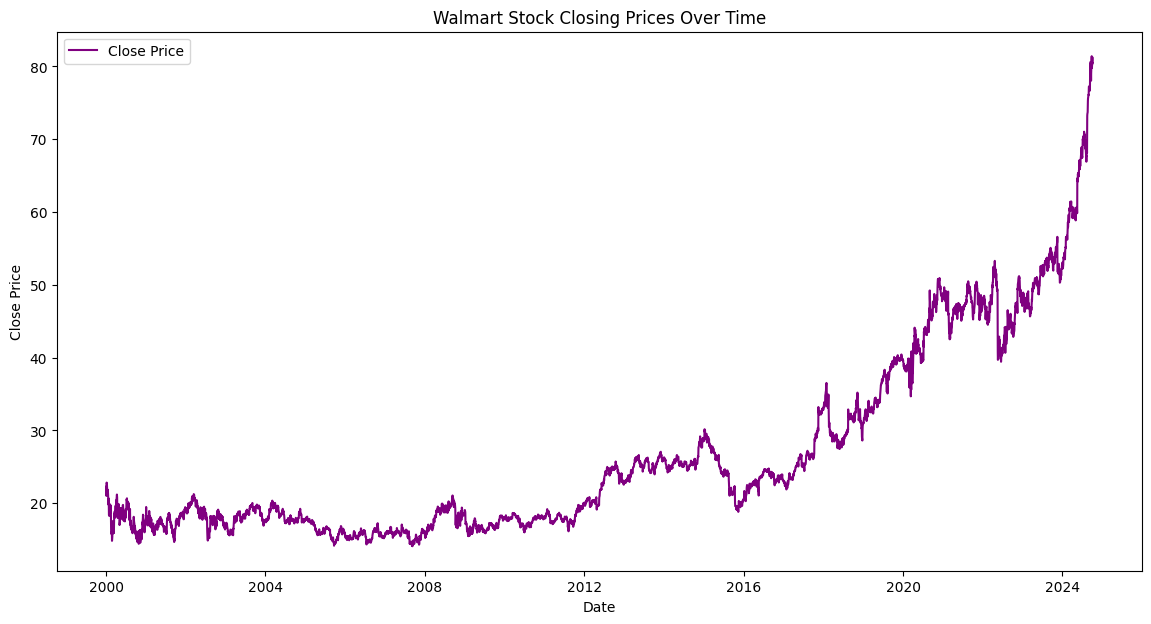

In [10]:
# Data Visualization
# Plot closing price over time
plt.figure(figsize=(14, 7))
plt.plot(walmart_df['Close'], label='Close Price', color='purple')
plt.title('Walmart Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

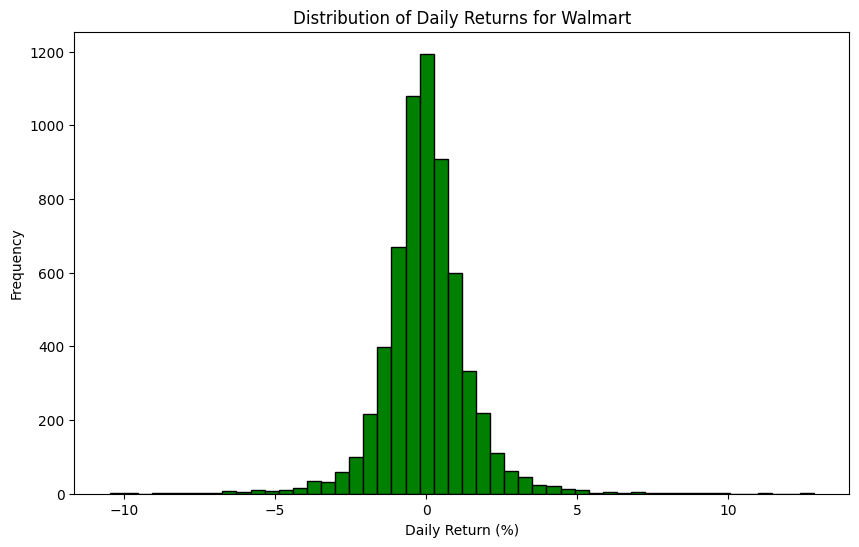

In [11]:
# Calculate daily returns
walmart_df['Daily_Return'] = walmart_df['Close'].pct_change() * 100

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(walmart_df['Daily_Return'].dropna(), bins=50, color='green', edgecolor='black')
plt.title('Distribution of Daily Returns for Walmart')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()